In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/WHOregionLifeExpectancyAtBirth.csv")

In [157]:
df

,Location,Period,Indicator,Dim1,First Tooltip
0,Africa,2019,Life expectancy at birth (years),-1,64.49
1,Africa,2019,Life expectancy at birth (years),1,62.37
2,Africa,2019,Life expectancy at birth (years),0,66.65
3,Africa,2015,Life expectancy at birth (years),-1,62.56
4,Africa,2015,Life expectancy at birth (years),1,60.47
...,...,...,...,...,...
67,Western Pacific,2010,Life expectancy at birth (years),1,72.52
68,Western Pacific,2010,Life expectancy at birth (years),0,78.75
69,Western Pacific,2000,Life expectancy at birth (years),-1,72.42
70,Western Pacific,2000,Life expectancy at birth (years),1,69.80


In [159]:
df.describe()

,Period,Dim1,First Tooltip
count,72.000000,72.000000,72.000000
mean,2011.000000,0.000000,70.556806
std,7.156205,0.822226,6.880156
min,2000.000000,-1.000000,51.060000
25%,2007.500000,-1.000000,66.585000
50%,2012.500000,0.000000,71.375000
75%,2016.000000,1.000000,75.525000
max,2019.000000,1.000000,81.290000


In [158]:
df.drop_duplicates()

,Location,Period,Indicator,Dim1,First Tooltip
0,Africa,2019,Life expectancy at birth (years),-1,64.49
1,Africa,2019,Life expectancy at birth (years),1,62.37
2,Africa,2019,Life expectancy at birth (years),0,66.65
3,Africa,2015,Life expectancy at birth (years),-1,62.56
4,Africa,2015,Life expectancy at birth (years),1,60.47
...,...,...,...,...,...
67,Western Pacific,2010,Life expectancy at birth (years),1,72.52
68,Western Pacific,2010,Life expectancy at birth (years),0,78.75
69,Western Pacific,2000,Life expectancy at birth (years),-1,72.42
70,Western Pacific,2000,Life expectancy at birth (years),1,69.80


In [162]:
print('Mean',df['First Tooltip'].mean())
print('Median',df['First Tooltip'].median())
print('Mode',df['First Tooltip'].mode())

Mean 70.55680555555556
Median 71.375
Mode 0     51.06
1     52.65
2     54.31
3     57.69
4     59.49
      ...  
67    79.84
68    80.31
69    80.32
70    80.83
71    81.29
Length: 72, dtype: float64


In [163]:
Q1=df['First Tooltip'].quantile(.25)
Q3=df['First Tooltip'].quantile(.75)
print('IQR',Q3-Q1)

IQR 8.939999999999984


In [164]:
import scipy.stats as stats
Zscore=stats.zscore(df['First Tooltip'])
print('Zscore',Zscore)

Zscore 0    -0.887971
1    -1.198266
2    -0.571822
3    -1.170457
4    -1.476361
        ...   
67    0.287344
68    1.199201
69    0.272707
70   -0.110770
71    0.698631
Name: First Tooltip, Length: 72, dtype: float64


In [166]:
df['First Tooltip'].interpolate(method='linear',limit_direction='forward')

0     64.49
1     62.37
2     66.65
3     62.56
4     60.47
      ...  
67    72.52
68    78.75
69    72.42
70    69.80
71    75.33
Name: First Tooltip, Length: 72, dtype: float64

Mean 70.55680555555556
Median 71.375
Mode 0     51.06
1     52.65
2     54.31
3     57.69
4     59.49
      ...  
67    79.84
68    80.31
69    80.32
70    80.83
71    81.29
Length: 72, dtype: float64


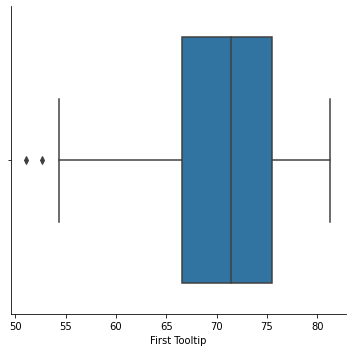

In [207]:
import seaborn as sns
sns.catplot(x='First Tooltip',kind='box',data=df)
print('Mean',df['First Tooltip'].mean())
print( 'Median' ,df['First Tooltip'].median())
print( 'Mode' ,df[ 'First Tooltip' ].mode())

IQR 8.939999999999984


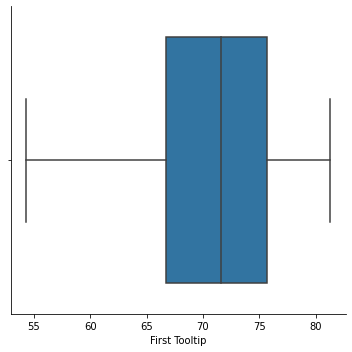

In [168]:
Ql=df['First Tooltip'].quantile(.25)
Q3=df['First Tooltip'].quantile(.75)
IQR=Q3-Q1
print('IQR',Q3-Q1)
lb=Q1-1.5*IQR

ub=Q3+1.5*IQR

dfout=df[(df['First Tooltip']>lb) & (df['First Tooltip']<ub) ]
dfout.shape
dfout.tail()
sns.catplot(x='First Tooltip',kind='box',data=dfout)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Africa,2019,Life expectancy at birth (years),-1,64.49
1,Africa,2019,Life expectancy at birth (years),1,62.37
2,Africa,2019,Life expectancy at birth (years),0,66.65
3,Africa,2015,Life expectancy at birth (years),-1,62.56
4,Africa,2015,Life expectancy at birth (years),1,60.47


Text(0, 0.5, 'Location')

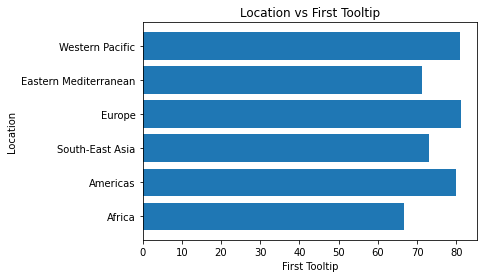

In [156]:
plt.barh(df['Location'],df['First Tooltip'] )
plt.title("Location vs First Tooltip")
plt.xlabel("First Tooltip")
plt.ylabel("Location")

In [320]:
x = df.iloc[:,[1,4]]
y = df.iloc[:,-1]

In [321]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.25)

In [322]:
reg = LinearRegression()
model = reg.fit(x_train,y_train)

In [323]:
reg = LinearRegression()
model = reg.fit(x_train,y_train)

In [324]:
y_pred = model.predict(x_test)

In [325]:
dt = pd.DataFrame()
dt['Period']=x['Period']
dt['First Tooltip'] = y

<AxesSubplot:xlabel='First Tooltip', ylabel='Period'>

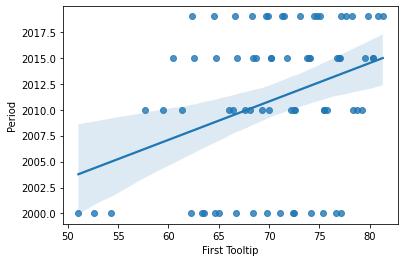

In [327]:
sns.regplot(y='Period',x='First Tooltip',data=dt)


In [267]:
X= df.iloc[:, [1,4]].values

In [268]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,14):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

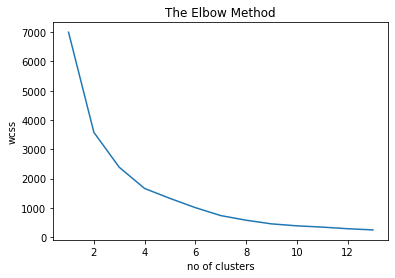

In [269]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,14), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [270]:
#Model Build
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


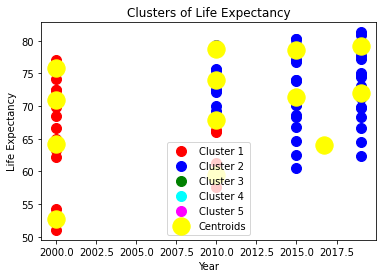

In [271]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

In [ ]:
#Clusters
#cluster1 (Red): Recent years Life expectancy increase
#cluster2 (Blue): Olden years life expectancy was less or an average
#cluster3 (Green): around 2010 the life expectancy grew higher
#cluster4 (Cyan): from 2010 to the recent years the life expectancy 

In [247]:
df.dropna(inplace = True)
df['Dim1']= df['Dim1'].replace({'Male':1, 'Female':0,'Both sexes':-1})

In [219]:
x=df.iloc[:, [1,3]].values
print(x[0:10])

[[2019   -1]
 [2019    1]
 [2019    0]
 [2015   -1]
 [2015    1]
 [2015    0]
 [2010   -1]
 [2010    1]
 [2010    0]
 [2000   -1]]


In [220]:
df['Dim1']= df['Dim1'].replace({'Male':1, 'Female':0,'Both sexes':-1})
df['Dim1']

0    -1
1     1
2     0
3    -1
4     1
     ..
67    1
68    0
69   -1
70    1
71    0
Name: Dim1, Length: 72, dtype: int64

In [221]:
y = df.iloc[:, 3].values
print(y[0:10])

[-1  1  0 -1  1  0 -1  1  0 -1]


In [222]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [223]:
standard_Scalar = StandardScaler()
x_train = standard_Scalar.fit_transform(x_train)
x_test = standard_Scalar.transform(x_test)

In [224]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [225]:
y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)

[ 1  1  1  0  0  0 -1 -1 -1  0  1  1  0  1  0  0 -1  0]
[ 1  1  1  0  0  0 -1 -1 -1  0  1  1  0  1  0  0 -1  0]


In [226]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [227]:
# Calculate specificity, recall, precision and F1-score
tn = conf_matrix.ravel()
fp= conf_matrix.ravel()
fn= conf_matrix.ravel()
tp= conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

<ipython-input-227-a7a206277d57>:6: RuntimeWarning: invalid value encountered in true_divide
  specificity = tn / (tn + fp)
<ipython-input-227-a7a206277d57>:7: RuntimeWarning: invalid value encountered in true_divide
  recall = tp / (tp + fn)
<ipython-input-227-a7a206277d57>:8: RuntimeWarning: invalid value encountered in true_divide
  precision = tp / (tp + fp)


In [205]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: ", accuracy)
print("Specificity: ", specificity)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)
print("Classification Report:\n", report)
print("True positive: ",tp)
print("True negative: ", tn)

Confusion Matrix:
 [[4 0 0]
 [0 8 0]
 [0 0 6]]
Accuracy:  1.0
Specificity:  [0.5 nan nan nan 0.5 nan nan nan 0.5]
Recall:  [0.5 nan nan nan 0.5 nan nan nan 0.5]
Precision:  [0.5 nan nan nan 0.5 nan nan nan 0.5]
F1-score:  [0.5 nan nan nan 0.5 nan nan nan 0.5]
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

True positive:  [4 0 0 0 8 0 0 0 6]
True negative:  [4 0 0 0 8 0 0 0 6]


In [242]:
#can be done by using either train_size or test_size
from sklearn.model_selection import train_test_split
x = df['Period']
y = df['First Tooltip']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, shuffle = True)
from sklearn.linear_model import LinearRegression
print(x_train.shape)
print(x_test.shape)



(54,)
(18,)


In [243]:
import numpy as np
x_train=np.array(x_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)

model=LinearRegression()
model. fit(x_train,y_train)

print (model. coef_)
print(model.intercept_)

[[0.3439767]]
[-620.56959448]


In [244]:
y_test=np.array(y_test).reshape(-1,1)
y_pred=model.predict(y_test)
print(y_pred)

[[-596.58065946]
 [-594.05243072]
 [-597.7329814 ]
 [-598.31774179]
 [-597.64354746]
 [-598.20422948]
 [-594.20722023]
 [-595.42489775]
 [-593.65685751]
 [-594.09026815]
 [-597.14134148]
 [-598.35557923]
 [-597.07254614]
 [-595.09811988]
 [-599.76932346]
 [-603.00614421]
 [-596.49466528]
 [-595.87894699]]


In [245]:
#Performance analysis

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

print("Mean squared error:", mean_squared_error(y_test, y_pred))
print('variance score:',r2_score(y_test, y_pred))

print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute error: 665.8676389236267
Mean squared error: 443398.5186403207
variance score: -10145.92880191365
Root Mean Squared Error: 665.8817602550175
